In [1]:
import pandas as pd
import numpy as np

In [2]:
import dabl

In [3]:
cols = ['location', 'country', 'Winner', 'title_bout', 'weight_class', 'gender',
       'empty_arena', 'better_rank', 'lose_streak_dif', 'win_streak_dif',
       'longest_win_streak_dif', 'win_dif', 'loss_dif', 'total_round_dif',
       'total_title_bout_dif', 'ko_dif', 'sub_dif', 'height_dif', 'reach_dif',
       'age_dif', 'sig_str_dif', 'avg_sub_att_dif', 'avg_td_dif', 'B_fighter',
       'B_odds', 'R_fighter', 'R_odds']

In [4]:
ufc = pd.read_csv('../data/tf_data/ufc-master.csv')

In [5]:
ufc = ufc[cols]

In [6]:
ufc.head()

,location,country,Winner,title_bout,weight_class,gender,empty_arena,better_rank,lose_streak_dif,win_streak_dif,...,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,B_fighter,B_odds,R_fighter,R_odds
0,"Houston, Texas, USA",USA,Blue,True,Heavyweight,MALE,0,Red,0,2,...,2.54,5.08,-5,2.88,0.3,0.22,Ciryl Gane,-320,Derrick Lewis,250
1,"Houston, Texas, USA",USA,Red,False,Bantamweight,MALE,0,Red,0,0,...,-2.54,-12.70,0,1.92,0.6,0.07,Pedro Munhoz,-115,Jose Aldo,-105
2,"Houston, Texas, USA",USA,Blue,False,Welterweight,MALE,0,Red,0,-1,...,-5.08,0.00,-4,3.78,-0.1,-2.98,Vicente Luque,-105,Michael Chiesa,-115
3,"Houston, Texas, USA",USA,Red,False,Women's Strawweight,FEMALE,0,Red,0,-1,...,5.08,10.16,5,1.00,0.0,-0.17,Angela Hill,140,Tecia Torres,-160
4,"Houston, Texas, USA",USA,Red,False,Bantamweight,MALE,0,neither,0,0,...,-2.54,2.54,7,-0.06,0.1,0.60,Casey Kenney,-125,Song Yadong,105


In [7]:
ufc['weight_class'] = ufc['weight_class'].str.replace("Women\'s", "") # removing extra text since gender is given in col
ufc = ufc[ufc['weight_class'] != 'Catchweight']

In [8]:
ufc.head()

,location,country,Winner,title_bout,weight_class,gender,empty_arena,better_rank,lose_streak_dif,win_streak_dif,...,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,B_fighter,B_odds,R_fighter,R_odds
0,"Houston, Texas, USA",USA,Blue,True,Heavyweight,MALE,0,Red,0,2,...,2.54,5.08,-5,2.88,0.3,0.22,Ciryl Gane,-320,Derrick Lewis,250
1,"Houston, Texas, USA",USA,Red,False,Bantamweight,MALE,0,Red,0,0,...,-2.54,-12.70,0,1.92,0.6,0.07,Pedro Munhoz,-115,Jose Aldo,-105
2,"Houston, Texas, USA",USA,Blue,False,Welterweight,MALE,0,Red,0,-1,...,-5.08,0.00,-4,3.78,-0.1,-2.98,Vicente Luque,-105,Michael Chiesa,-115
3,"Houston, Texas, USA",USA,Red,False,Strawweight,FEMALE,0,Red,0,-1,...,5.08,10.16,5,1.00,0.0,-0.17,Angela Hill,140,Tecia Torres,-160
4,"Houston, Texas, USA",USA,Red,False,Bantamweight,MALE,0,neither,0,0,...,-2.54,2.54,7,-0.06,0.1,0.60,Casey Kenney,-125,Song Yadong,105


In [9]:
ufc_clean = dabl.clean(ufc)

In [10]:
types = dabl.detect_types(ufc_clean)

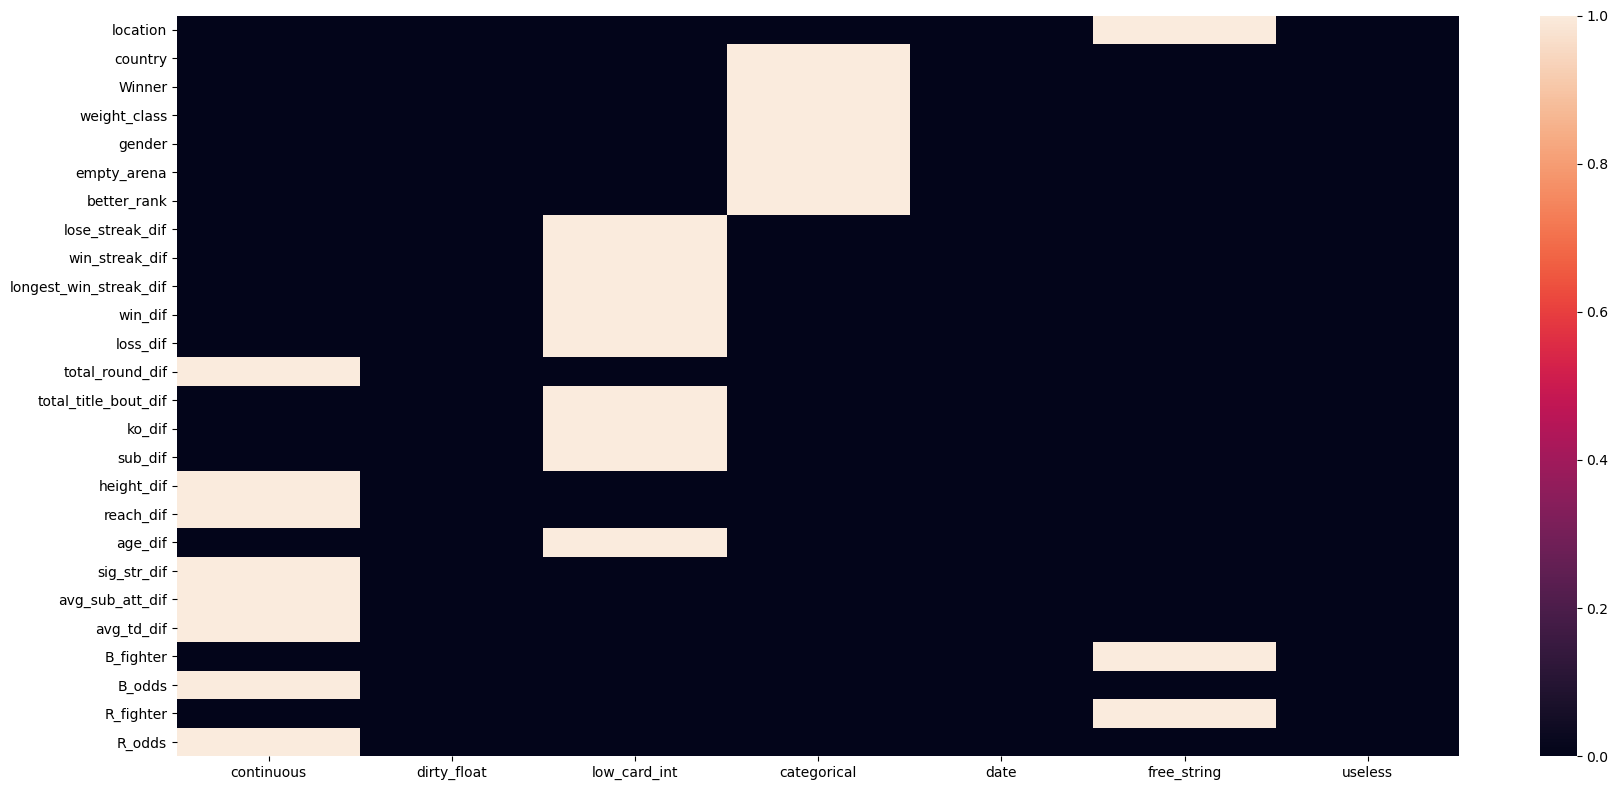

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,8))
sns.heatmap(types)
plt.tight_layout()
plt.show()

In [12]:
ufc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4826 entries, 0 to 4825
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   location                4826 non-null   object  
 1   country                 4826 non-null   category
 2   Winner                  4826 non-null   category
 3   weight_class            4826 non-null   category
 4   gender                  4826 non-null   category
 5   empty_arena             4826 non-null   category
 6   better_rank             4826 non-null   category
 7   lose_streak_dif         4826 non-null   int64   
 8   win_streak_dif          4826 non-null   int64   
 9   longest_win_streak_dif  4826 non-null   int64   
 10  win_dif                 4826 non-null   int64   
 11  loss_dif                4826 non-null   int64   
 12  total_round_dif         4826 non-null   int64   
 13  total_title_bout_dif    4826 non-null   int64   
 14  ko_dif                  

Target looks like classification


C:\Users\jpzam\miniconda3\envs\tf_gpu\lib\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 2 outliers in column B_odds.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\jpzam\miniconda3\envs\tf_gpu\lib\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 1 outliers in column R_odds.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\jpzam\miniconda3\envs\tf_gpu\lib\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 3 outliers in column win_streak_dif.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\jpzam\miniconda3\envs\tf_gpu\lib\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 8 outliers in column avg_td_dif.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\jpzam\miniconda3\envs\tf_gpu\lib\site-packages\dabl\plot\utils.py:632: UserWarning: Dropped 3 outliers in column reach_dif.
  warn("Dropped {} outliers in column {}.".format(
C:\Users\jpzam\miniconda3\envs\tf_gpu\lib\site-packages\dabl\plot\utils.py:632: 

Linear Discriminant Analysis training set score: 0.626


C:\Users\jpzam\miniconda3\envs\tf_gpu\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
C:\Users\jpzam\miniconda3\envs\tf_gpu\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


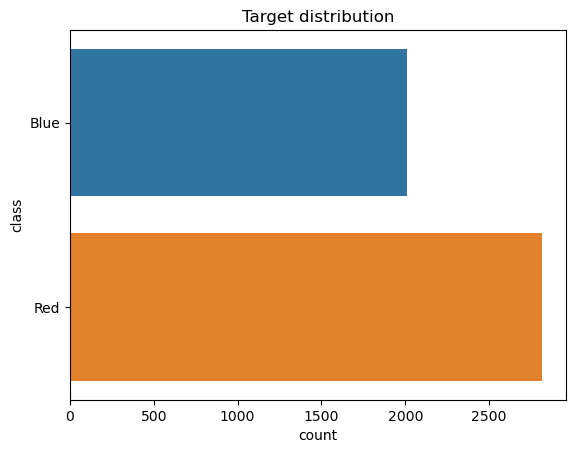

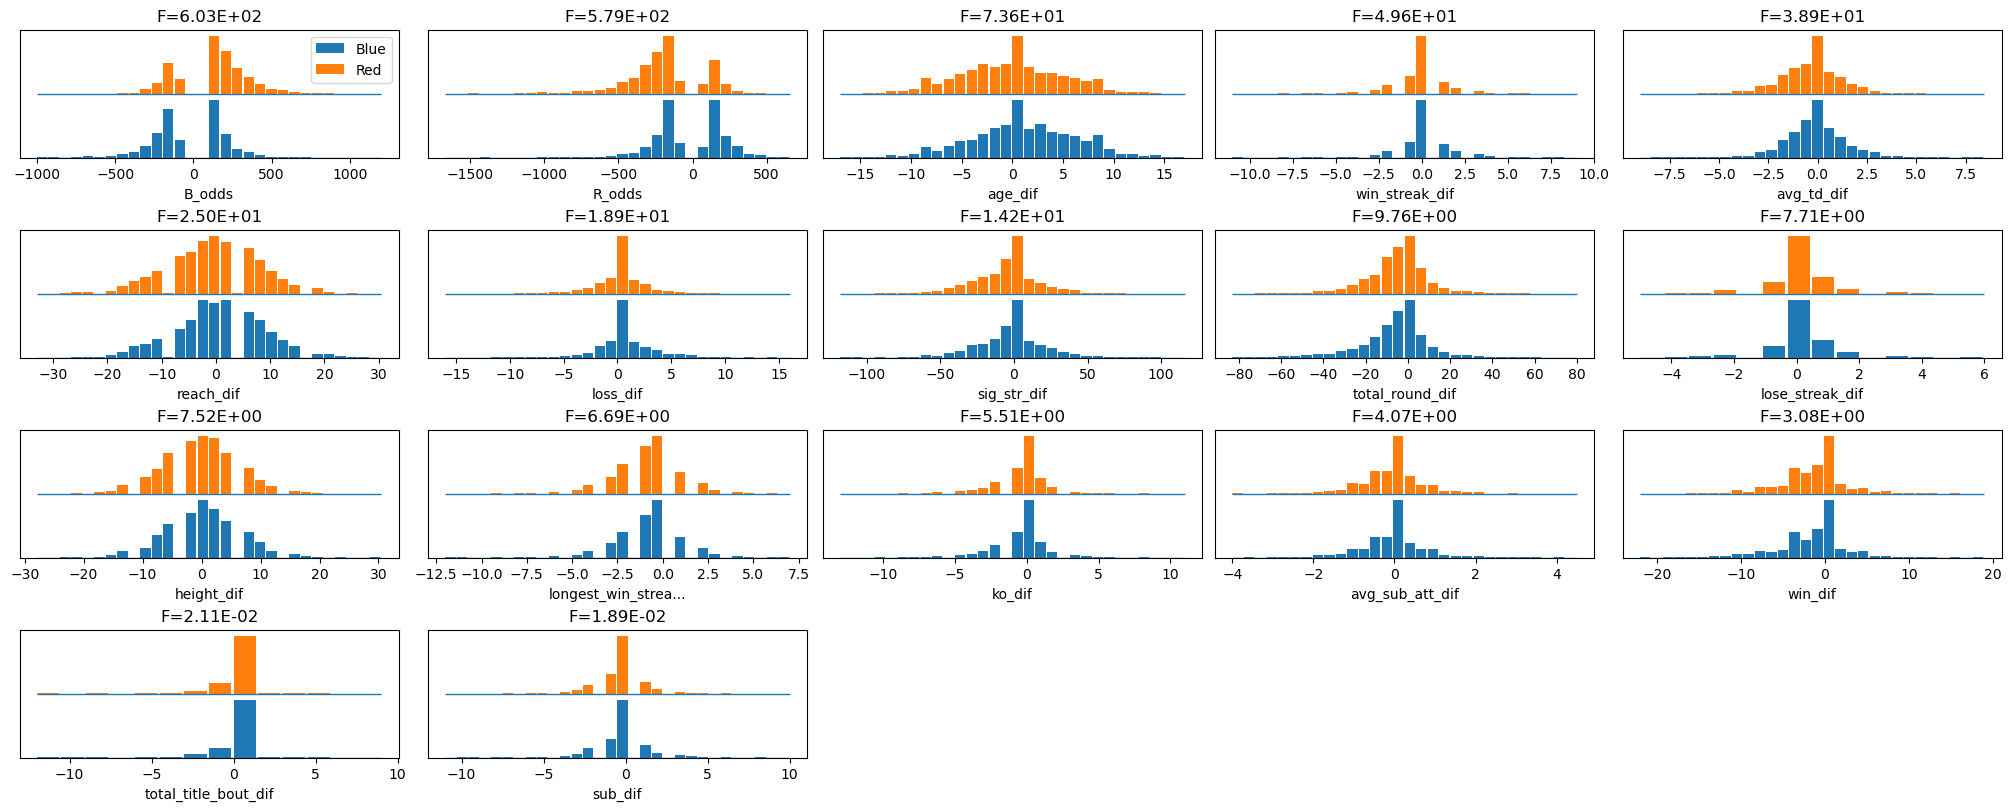

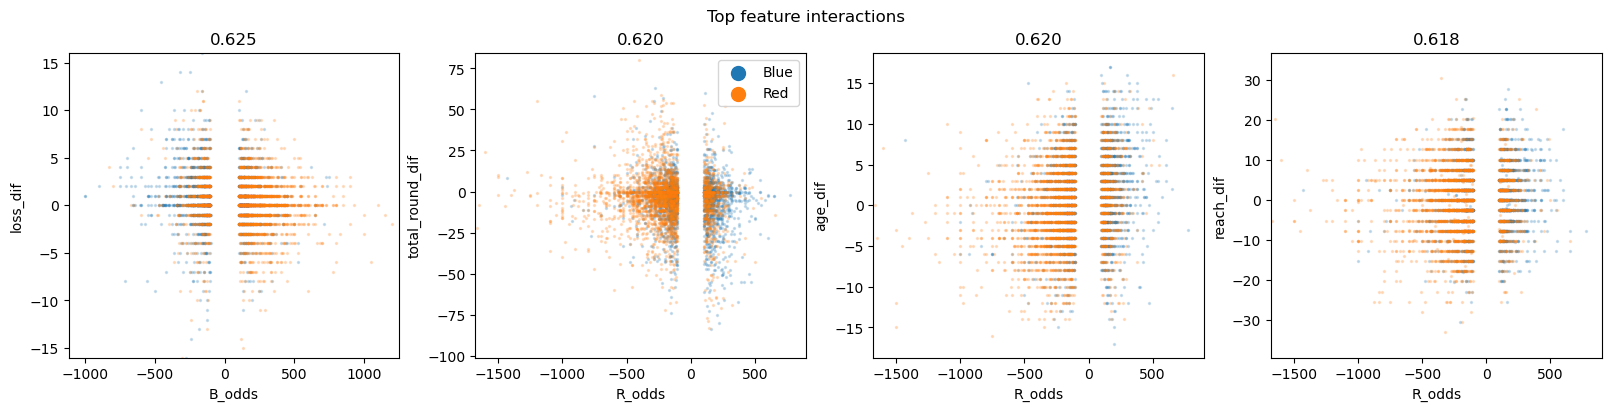

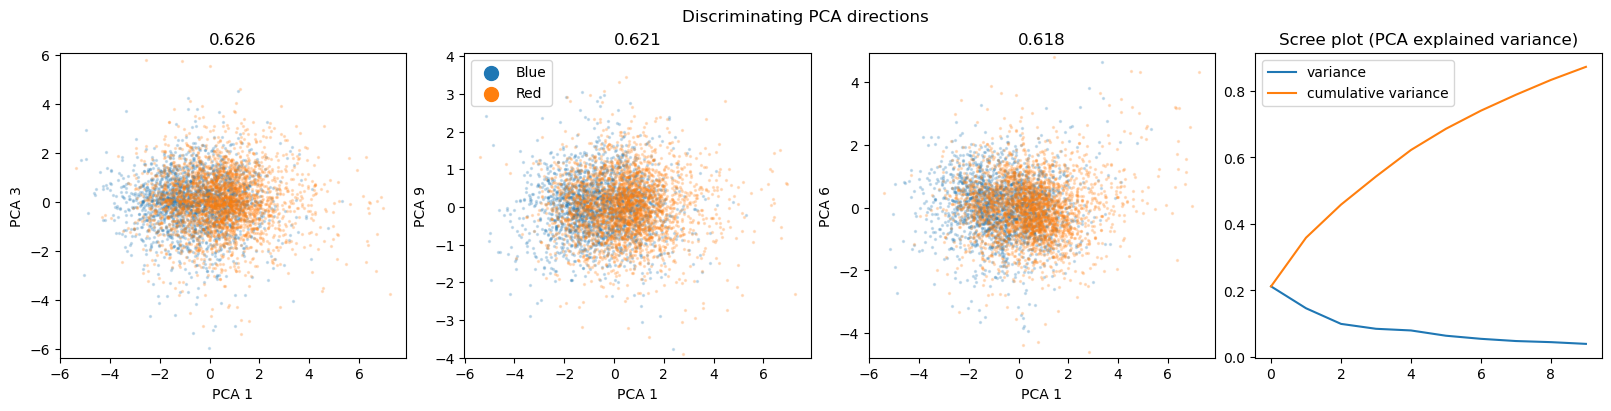

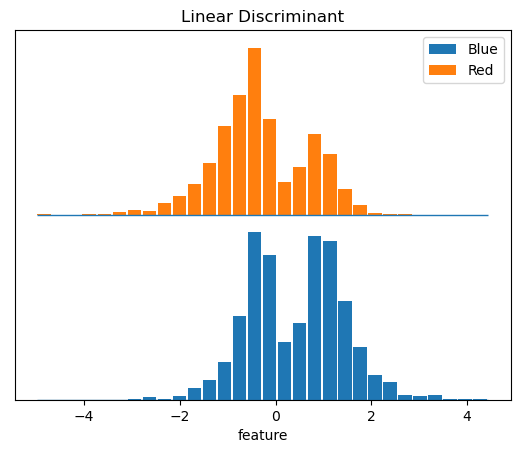

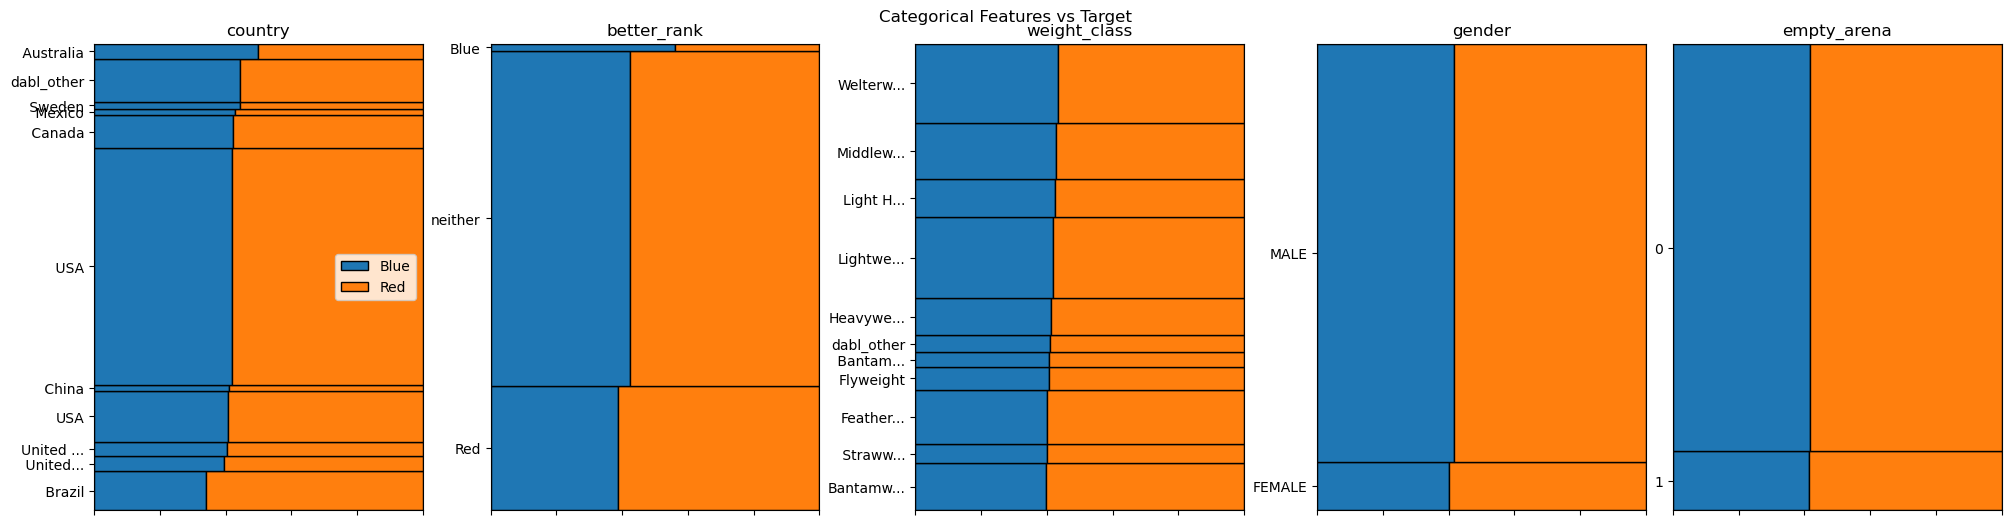

In [13]:
dabl.plot(ufc_clean, target_col='Winner')
plt.show()

In [14]:
ufc_clean.drop(['R_fighter', 'B_fighter'], inplace=True, axis=1)

In [15]:
cats = ufc_clean.select_dtypes('category').columns.values
ufc_clean[cats] = ufc_clean[cats].astype('object')

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [17]:
X = ufc_clean.drop('Winner', axis=1)
print(f'X shape: {X.shape}')
y = ufc_clean.Winner.map({'Blue': 0, 'Red': 1})
print(f'y shape: {y.shape}\n')

num_features = ufc_clean.select_dtypes(np.number).columns.values
cat_features = ufc_clean.select_dtypes('object').drop('Winner', axis=1).columns.values
print(f'Numerical features: \n{num_features}\n')
print(f'Categorical features: \n{cat_features}\n')

num_transformer = make_pipeline(StandardScaler())
cat_transformer = make_pipeline(OneHotEncoder(handle_unknown='ignore', sparse=False))

preprocessor = make_column_transformer((num_transformer, num_features),
                                       (cat_transformer, cat_features))

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}\n')

input_shape = [X_train.shape[1]]
print(f'Input shape: {input_shape}')

X shape: (4826, 23)
y shape: (4826,)

Numerical features: 
['lose_streak_dif' 'win_streak_dif' 'longest_win_streak_dif' 'win_dif'
 'loss_dif' 'total_round_dif' 'total_title_bout_dif' 'ko_dif' 'sub_dif'
 'height_dif' 'reach_dif' 'age_dif' 'sig_str_dif' 'avg_sub_att_dif'
 'avg_td_dif' 'B_odds' 'R_odds']

Categorical features: 
['location' 'country' 'weight_class' 'gender' 'empty_arena' 'better_rank']

X_train shape: (3860, 210)
X_test shape: (966, 210)

Input shape: [210]


In [28]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(50, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(50, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

In [29]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

Epoch 1/200
8/8 [==============================] - 1s 42ms/step - loss: 0.9169 - binary_accuracy: 0.5199 - val_loss: 0.6844 - val_binary_accuracy: 0.5497
Epoch 2/200
8/8 [==============================] - 0s 21ms/step - loss: 0.7974 - binary_accuracy: 0.5497 - val_loss: 0.6697 - val_binary_accuracy: 0.5880
Epoch 3/200
8/8 [==============================] - 0s 22ms/step - loss: 0.7397 - binary_accuracy: 0.5845 - val_loss: 0.6615 - val_binary_accuracy: 0.5921
Epoch 4/200
8/8 [==============================] - 0s 21ms/step - loss: 0.7089 - binary_accuracy: 0.5891 - val_loss: 0.6568 - val_binary_accuracy: 0.6025
Epoch 5/200
8/8 [==============================] - 0s 17ms/step - loss: 0.6802 - binary_accuracy: 0.6187 - val_loss: 0.6543 - val_binary_accuracy: 0.5952
Epoch 6/200
8/8 [==============================] - 0s 17ms/step - loss: 0.6678 - binary_accuracy: 0.6168 - val_loss: 0.6525 - val_binary_accuracy: 0.6004
Epoch 7/200
8/8 [==============================] - 0s 17ms/step - loss: 0.66

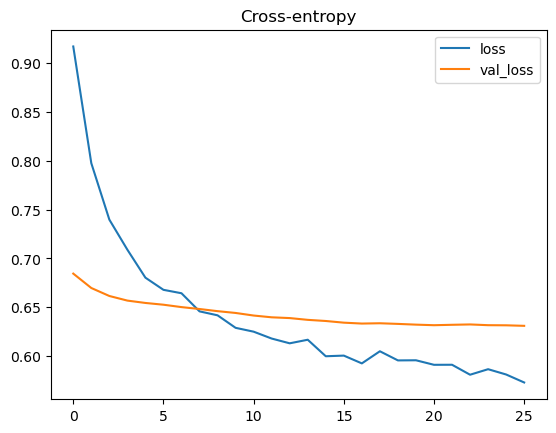

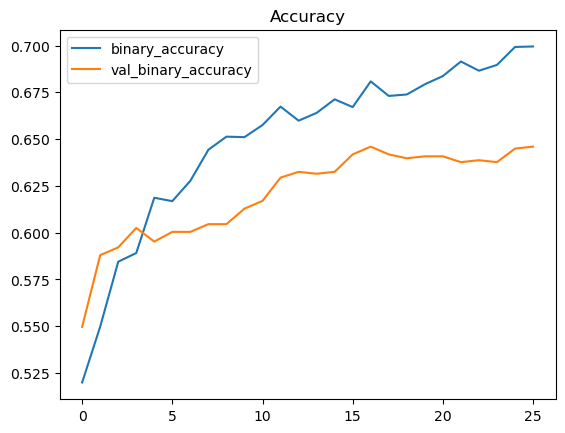

In [30]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=500,
    epochs=200,
    callbacks=[early_stopping]
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

plt.show()